# Feature (Conformational) Selection

In [1]:
import pandas as pd
import numpy as np
import glob, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style = 'whitegrid', font_scale = 1.3)

In [2]:
sys.path.append('..')
from modules.plotting_metrics import PlotMetric

In [3]:
# Helper function
%run ./helper_functions_S6.ipynb

### Load the data:

In [4]:
# Dictionary of docking results
# notebook helper_functions does the trick
scores_dic = get_docking_scores_dict()

In [7]:
df_test = scores_dic['CSAR']['Dk_sc']['X']

In [39]:
# Get the correlation matrix
# Pearson 
corr_n_pear = df_test.corr()
corr_r_pear = df_test.rank(axis=0).corr()
# Spearman 
corr_n_spear = df_test.corr(method = 'spearman')
corr_r_spear = df_test.rank(axis=0).corr(method = 'spearman')

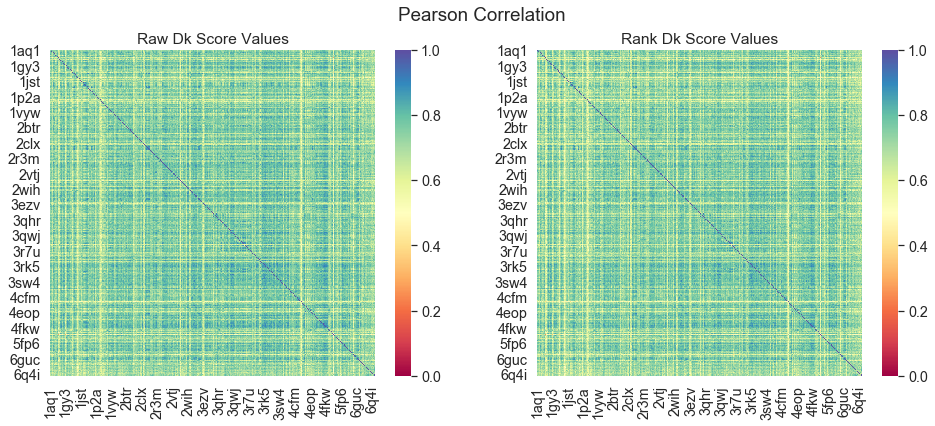

In [44]:
# Plot the correlation matrix using Pearson Correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(corr_n_pear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax1)\
                                        .set_title('Raw Dk Score Values')
sns.heatmap(corr_r_pear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax2)\
                                        .set_title('Rank Dk Score Values')
fig.suptitle('Pearson Correlation (402 vs 402 confs)')
plt.show()

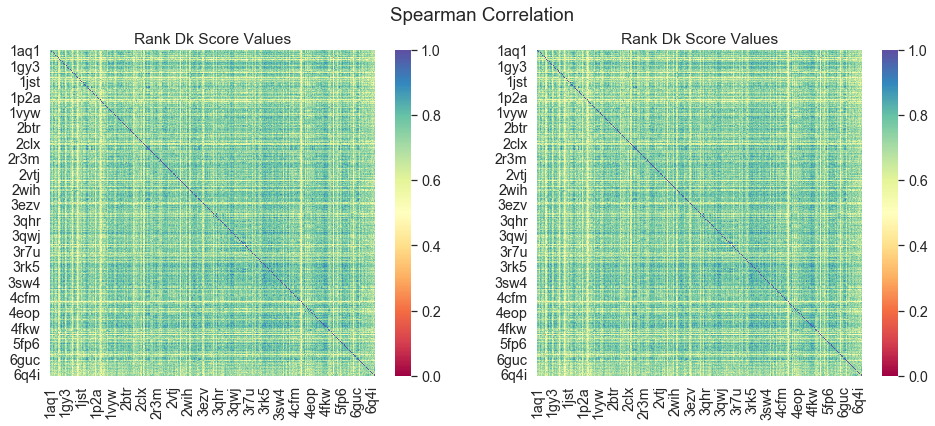

In [45]:
# Plot the correlation matrix using Pearson Correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(corr_n_spear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax1)\
                                        .set_title('Rank Dk Score Values')
sns.heatmap(corr_r_spear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax2)\
                                        .set_title('Rank Dk Score Values')
fig.suptitle('Pearson Correlation (402 vs 402 confs)')
plt.show()

In [46]:
# We are going to keep the spearman correaltion matrix usin the ranked values

In [47]:
# Next step, clustering using ward hierarchical clustring

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [111]:
hc_corr = AgglomerativeClustering(n_clusters = 3, 
                                  #distance_threshold = 0,
                                  linkage = 'complete')
hc_corr.fit(corr_r_spear)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [112]:
# Get the labels of a ginven cutoff
k3_labels = hc_corr.labels_

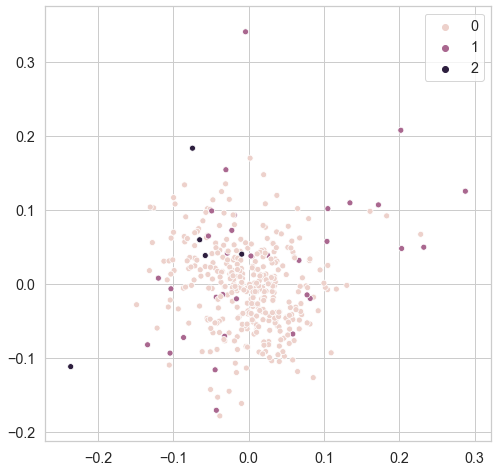

In [113]:
# Convert to a distance matrix
from modules.MDS import cMDS

dist_corr = 1 - corr_r_spear

mds_corr = cMDS(dist_corr)

# Plt the cMDS
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = mds_corr[0][2], y = mds_corr[0][1], hue= k3_labels, cmap = 'viridis')

In [125]:
df_test

,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,1e9h,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
Ligando,,,,,,,,,,,,,,,,,,,,,
CS1,-8.1,-6.9,-7.1,-7.6,-6.9,-7.5,-8.5,-7.4,-6.9,-7.2,...,-6.5,-6.6,-6.1,-6.3,-6.3,-6.4,-6.9,-6.3,-7.1,-6.5
CS2,-7.1,-6.0,-6.1,-6.5,-6.1,-6.2,-7.3,-6.6,-6.2,-6.6,...,-5.3,-5.7,-5.1,-5.7,-5.7,-5.4,-6.2,-5.5,-5.7,-5.4
CS3,-7.9,-7.9,-7.6,-6.8,-7.8,-7.7,-8.7,-7.6,-7.6,-8.0,...,-6.5,-6.8,-6.4,-7.0,-6.8,-7.2,-7.3,-6.5,-6.9,-6.5
CS4,-8.7,-8.4,-8.1,-7.6,-8.1,-8.0,-8.3,-8.3,-8.0,-8.6,...,-7.0,-7.4,-6.6,-7.0,-6.8,-7.2,-7.3,-6.8,-7.0,-6.8
CS5,-7.9,-7.8,-7.2,-6.7,-8.2,-7.7,-7.2,-7.9,-7.4,-7.3,...,-7.1,-7.2,-7.2,-6.9,-6.7,-7.1,-7.9,-6.5,-7.6,-7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS247,-10.5,-10.1,-9.6,-9.8,-10.9,-10.4,-10.5,-10.8,-10.0,-9.9,...,-9.1,-9.3,-9.3,-9.7,-8.8,-10.1,-9.5,-9.0,-9.4,-9.0
CS248,-9.3,-8.7,-8.9,-8.2,-10.0,-9.2,-9.4,-9.2,-8.5,-9.4,...,-7.7,-8.1,-8.2,-8.3,-8.2,-8.2,-8.2,-8.2,-7.8,-7.8
CS260,-8.9,-9.1,-9.1,-8.7,-9.6,-9.9,-9.2,-9.8,-9.6,-8.8,...,-8.7,-8.8,-8.2,-9.5,-8.1,-8.7,-8.9,-8.3,-8.6,-9.0


array([0.7413475 , 0.02146025])

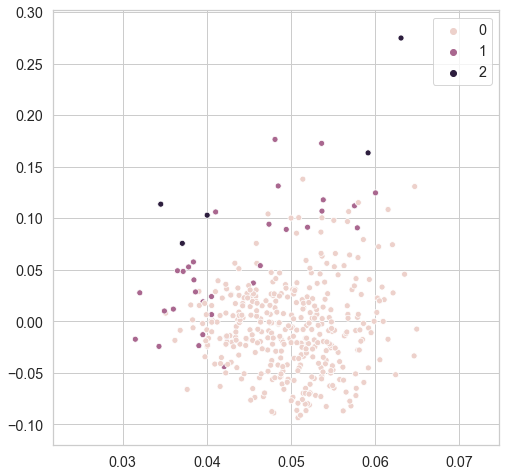

In [124]:
# Performing a PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PCA(n_components=2))

pipe.fit_transform(df_test)
# Plot
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = pipe['pca'].components_[0], y = pipe['pca'].components_[1], 
                hue= k3_labels, cmap = 'viridis')

pipe['pca'].explained_variance_ratio_

In [60]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

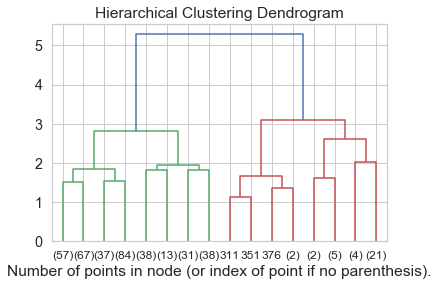

In [64]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(hc_corr, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()